In [1]:
%tensorflow_version 1.x 
!pip install keras==2.2.4

TensorFlow 1.x selected.
     |████████████████████████████████| 317kB 4.9MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [2]:
pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-tc4te1pd
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-tc4te1pd
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101064 sha256=5f4ffaae5043da237b84db9bbf10c6ebcea8cb267b944af1e9d2d9326547bc31
  Stored in directory: /tmp/pip-ephem-wheel-cache-acs4faxg/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [0]:
data = pd.read_csv("ner_dataset.csv", encoding="latin1")

In [5]:
data[:5]

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [6]:
len(data)

1048575

In [7]:
str(data.isnull().values.any())

'True'

In [8]:
data.isnull().sum()

Sentence #    1000616
Word                0
POS                 0
Tag                 0
dtype: int64

In [9]:
print('Sentence # 열의 중복을 제거한 값의 개수 : {}'.format(data['Sentence #'].nunique()))
print('Word 열의 중복을 제거한 값의 개수 : {}'.format(data['Word'].nunique()))
print('Tag 열의 중복을 제거한 값의 개수 : {}'.format(data['Tag'].nunique()))


Sentence # 열의 중복을 제거한 값의 개수 : 47959
Word 열의 중복을 제거한 값의 개수 : 35178
Tag 열의 중복을 제거한 값의 개수 : 17


In [10]:
print('Tag 열의 각각의 값의 개수 카운트')
print('================================')
print(data.groupby('Tag').size().reset_index(name='count'))

Tag 열의 각각의 값의 개수 카운트
      Tag   count
0   B-art     402
1   B-eve     308
2   B-geo   37644
3   B-gpe   15870
4   B-nat     201
5   B-org   20143
6   B-per   16990
7   B-tim   20333
8   I-art     297
9   I-eve     253
10  I-geo    7414
11  I-gpe     198
12  I-nat      51
13  I-org   16784
14  I-per   17251
15  I-tim    6528
16      O  887908


In [0]:
data = data.fillna(method='ffill')

In [12]:
data

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
...,...,...,...,...
1048570,Sentence: 47959,they,PRP,O
1048571,Sentence: 47959,responded,VBD,O
1048572,Sentence: 47959,to,TO,O
1048573,Sentence: 47959,the,DT,O


In [13]:
data.isnull().values.any()

False

In [14]:
data['Word'] = data['Word'].str.lower()
data.Word.nunique()

31817

In [15]:
data[:5]

,Sentence #,Word,POS,Tag
0,Sentence: 1,thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [16]:
func = lambda temp: [(w,t) for w, t in zip(temp['Word'].values.tolist(), temp['Tag'].values.tolist())]
tagged_sentences=[t for t in data.groupby('Sentence #').apply(func)]
len(tagged_sentences)

47959

In [17]:
tagged_sentences[0]

[('thousands', 'O'),
 ('of', 'O'),
 ('demonstrators', 'O'),
 ('have', 'O'),
 ('marched', 'O'),
 ('through', 'O'),
 ('london', 'B-geo'),
 ('to', 'O'),
 ('protest', 'O'),
 ('the', 'O'),
 ('war', 'O'),
 ('in', 'O'),
 ('iraq', 'B-geo'),
 ('and', 'O'),
 ('demand', 'O'),
 ('the', 'O'),
 ('withdrawal', 'O'),
 ('of', 'O'),
 ('british', 'B-gpe'),
 ('troops', 'O'),
 ('from', 'O'),
 ('that', 'O'),
 ('country', 'O'),
 ('.', 'O')]

In [18]:
len(data['Word'].values.tolist())

1048575

In [19]:
len(data.groupby('Sentence #'))

47959

In [0]:
sentences, ner_tags = [], []
for tagged_sentence in tagged_sentences:
  sentence, tag_info = zip(*tagged_sentence)
  sentences.append(list(sentence))
  ner_tags.append(list(tag_info))

In [21]:
print(sentences[0])
print(ner_tags[0])

['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']


샘플의 최대 길이 : 104
샘플의 평균 길이 : 21.863988


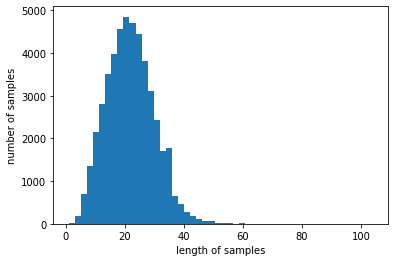

In [22]:
print('샘플의 최대 길이 : %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이 : %f' % (sum(map(len, sentences))/len(sentences)))
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [0]:
src_tokenizer = Tokenizer(oov_token='OOV')
src_tokenizer.fit_on_texts(sentences)
tar_tokenizer = Tokenizer(lower=False)
tar_tokenizer.fit_on_texts(ner_tags)

In [24]:
vocab_size = len(src_tokenizer.word_index)+1
tag_size = len(tar_tokenizer.word_index)+1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('개체명 태깅 정보 집합의 크기  : {}'.format(tag_size))

단어 집합의 크기 : 31819
개체명 태깅 정보 집합의 크기  : 18


In [0]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(ner_tags)

In [0]:
index_to_word = src_tokenizer.index_word
index_to_ner = tar_tokenizer.index_word
index_to_ner[0] = 'PAD'

In [27]:
index_to_ner

{0: 'PAD',
 1: 'O',
 2: 'B-geo',
 3: 'B-tim',
 4: 'B-org',
 5: 'I-per',
 6: 'B-per',
 7: 'I-org',
 8: 'B-gpe',
 9: 'I-geo',
 10: 'I-tim',
 11: 'B-art',
 12: 'B-eve',
 13: 'I-art',
 14: 'I-eve',
 15: 'B-nat',
 16: 'I-gpe',
 17: 'I-nat'}

In [28]:
decoded = []
for index in X_train[0]:
  decoded.append(index_to_word[index])

decoded

['thousands',
 'of',
 'demonstrators',
 'have',
 'marched',
 'through',
 'london',
 'to',
 'protest',
 'the',
 'war',
 'in',
 'iraq',
 'and',
 'demand',
 'the',
 'withdrawal',
 'of',
 'british',
 'troops',
 'from',
 'that',
 'country',
 '.']

In [0]:
max_len = 70
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2, random_state=777)

In [0]:
y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)

In [32]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (38367, 70)
훈련 샘플 레이블의 크기 : (38367, 70, 18)
테스트 샘플 문장의 크기 : (9592, 70)
테스트 샘플 레이블의 크기 : (9592, 70, 18)


In [33]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from keras_contrib.layers import CRF

Using TensorFlow backend.


In [34]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=20, input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(units=50, return_sequences=True, recurrent_dropout=0.1)))
model.add(TimeDistributed(Dense(50, activation="relu")))
crf = CRF(tag_size)
model.add(crf)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [35]:
model.compile(optimizer='rmsprop', loss=crf.loss_function, metrics=[crf.accuracy])
history = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.1, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/usr/local/lib/python3.6/dist-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '





Train on 34530 samples, validate on 3837 samples
Epoch 1/5





34530/34530 [==============================] - 188s 5ms/step - loss: 8.3748 - crf_viterbi_accuracy: 0.8896 - val_loss: 8.1830 - val_crf_viterbi_accuracy: 0.9272
Epoch 2/5
34530/34530 [==============================] - 183s 5ms/step - loss: 8.1305 - crf_viterbi_accuracy: 0.9475 - val_loss: 8.1053 - val_crf_viterbi_accuracy: 0.9504
Epoch 3/5
34530/34530 [==============================] - 183s 5ms/step - loss: 8.0961 - crf_viterbi_accuracy: 0.9571 - val_loss: 8.0960 - val_crf_viterbi_accuracy: 0.9464
Epoch 4/5
34530/34530 [==============================] - 184s 5ms/step - loss: 8.0818 - crf_viterbi_accuracy: 0.9610 - val_loss: 8.0861 - val_crf_viterbi_accuracy: 0.9508
Epoch 5/5
34530/34530 [==============================] - 179s 5ms/step - loss: 8.0736 - crf_viterbi_accuracy: 0.9636 - val_loss: 8.0780 - val_crf_viterbi_accuracy: 0.9572


In [36]:
model.evaluate(X_test, y_test)[1]

9592/9592 [==============================] - 12s 1ms/step


0.9593831792386797

In [37]:
i=10 # 확인하고 싶은 테스트용 샘플의 인덱스.
y_predicted = model.predict(np.array([X_test[i]])) # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
y_predicted = np.argmax(y_predicted, axis=-1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
true = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(X_test[i], true, y_predicted[0]):
    if w != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[w], index_to_ner[t], index_to_ner[pred]))

단어             |실제값  |예측값
-----------------------------------
gdp              : O       O
plunged          : O       O
18               : O       O
%                : O       O
in               : O       O
2009             : B-tim   B-tim
-                : I-tim   O
the              : O       O
three            : B-tim   O
baltic           : I-tim   B-geo
states           : O       I-geo
had              : O       O
the              : O       O
world            : O       O
's               : O       O
worst            : O       O
declines         : O       O
that             : B-tim   O
year             : O       O
.                : O       O


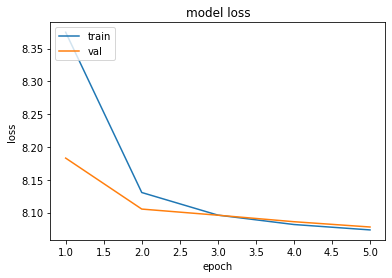

In [38]:
epochs = range(1, len(history.history['val_loss']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [39]:
!pip install seqeval
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report

  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=740d31595695d8f08ef8b4f9b339f94d2059ced97aec98881f93c65adf443922
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
Successfully built seqeval


In [0]:
def sequences_to_tag(sequences): # 예측값을 index_to_tag를 사용하여 태깅 정보로 변경하는 함수.
    result = []
    for sequence in sequences: # 전체 시퀀스로부터 시퀀스를 하나씩 꺼낸다.
        temp = []
        for pred in sequence: # 시퀀스로부터 예측값을 하나씩 꺼낸다.
            pred_index = np.argmax(pred) # 예를 들어 [0, 0, 1, 0 ,0]라면 1의 인덱스인 2를 리턴한다.
            temp.append(index_to_ner[pred_index].replace("PAD", "O")) # 'PAD'는 'O'로 변경
        result.append(temp)
    return result


In [0]:
y_predicted = model.predict(X_test)
pred_tags = sequences_to_tag(y_predicted)
test_tags = sequences_to_tag(y_test)

In [42]:
print(classification_report(test_tags, pred_tags))

           precision    recall  f1-score   support

      tim       0.92      0.79      0.85      4067
      gpe       0.96      0.94      0.95      3145
      org       0.72      0.50      0.59      4033
      per       0.78      0.75      0.77      3545
      geo       0.81      0.88      0.85      7620
      eve       0.00      0.00      0.00        52
      nat       0.00      0.00      0.00        37
      art       0.00      0.00      0.00        63

micro avg       0.84      0.78      0.81     22562
macro avg       0.83      0.78      0.80     22562



In [43]:
y_predicted[0]

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)